In [ ]:
# default_exp mldsutils

# Plotting module

> This is the plot module with some utility functions

In [ ]:
#export
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from nbdev.showdoc import *

In [ ]:
#export
def plot_decision_boundaries(X, y, model_class, **model_params):
    """
    
    ### Description
    
    Function to plot the decision boundaries of a classification model.
    This uses just the first two columns of the data for fitting 
    the model as we need to find the predicted value for every point in 
    scatter plot.
    
    ### Arguments:
        `X`: Feature data as a Numpy array.
        
        `y`: Label data as a Numpy array.
        
        `model_class`: A Scikit-learn ML estimator class e.g. `GaussianNB` (imported from `sklearn.naive_bayes`) or
        `LogisticRegression` (imported from `sklearn.linear_model`)
        
        `**model_params`: Model parameters to be passed on to the ML estimator.
    
    ### Typical code example:
    
        ```
        from sklearn.neighbors import KNeighborsClassifier
        from sklearn.datasets import make_classification
        
        X1, y1 = make_classification(n_features=10, n_samples=100,
                                     n_redundant=0, n_informative=10,
                                     n_clusters_per_class=1,class_sep=0.5)
        plt.figure()
        plt.title("KNN decision boundary with neighbros: 5",fontsize=16)
        plot_decision_boundaries(X1,y1,KNeighborsClassifier,n_neighbors=5)
        plt.show()
        ```
    """
    try:
        X = np.array(X)
        y = np.array(y).flatten()
    except:
        print("Coercing input data to NumPy arrays failed")
    # Reduces to the first two columns of data
    reduced_data = X[:, :2]
    # Instantiate the model object
    model = model_class(**model_params)
    # Fits the model with the reduced data
    model.fit(reduced_data, y)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].    

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    # Meshgrid creation
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh using the model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predictions to obtain the classification results
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Plotting
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.xlabel("Feature-1",fontsize=15)
    plt.ylabel("Feature-2",fontsize=15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    return plt

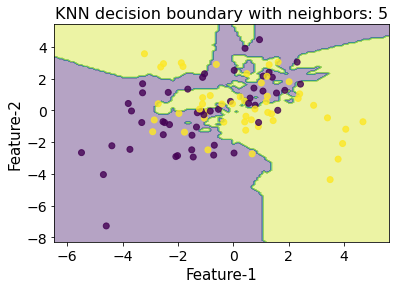

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
        
X1, y1 = make_classification(n_features=10, n_samples=100,
                                     n_redundant=0, n_informative=10,
                                     n_clusters_per_class=1,class_sep=0.5)
plt.figure()
plt.title("KNN decision boundary with neighbors: 5",fontsize=16)
plot_decision_boundaries(X1,y1,KNeighborsClassifier,n_neighbors=5)
plt.show()

In [ ]:
show_doc(plot_decision_boundaries)

<h4 id="plot_decision_boundaries" class="doc_header"><code>plot_decision_boundaries</code><a href="__main__.py#L2" class="source_link" style="float:right">[source]</a></h4>

> <code>plot_decision_boundaries</code>(**`X`**, **`y`**, **`model_class`**, **\*\*`model_params`**)

### Description

Function to plot the decision boundaries of a classification model.
This uses just the first two columns of the data for fitting 
the model as we need to find the predicted value for every point in 
scatter plot.

### Arguments:
    `X`: Feature data as a Numpy array.
    
    `y`: Label data as a Numpy array.
    
    `model_class`: A Scikit-learn ML estimator class e.g. `GaussianNB` (imported from `sklearn.naive_bayes`) or
    `LogisticRegression` (imported from `sklearn.linear_model`)
    
    `**model_params`: Model parameters to be passed on to the ML estimator.

### Typical code example:

    ```
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.datasets import make_classification
    
    X1, y1 = make_classification(n_features=10, n_samples=100,
                                 n_redundant=0, n_informative=10,
                                 n_clusters_per_class=1,class_sep=0.5)
    plt.figure()
    plt.title("KNN decision boundary with neighbros: 5",fontsize=16)
    plot_decision_boundaries(X1,y1,KNeighborsClassifier,n_neighbors=5)
    plt.show()
    ```